This notebook is for building neural networks for the purpose of malaria cell identification.The models metrics such as accuracy and recall are checked to understand the model performance.  

Data source :https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
batch_size = 32
img_height = 224
img_width = 224

In [5]:
data_dir = "../input/cell-images-for-detecting-malaria/cell_images/cell_images" 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.25,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 27558 files belonging to 2 classes.
Using 20669 files for training.


In [6]:
class_names = train_ds.class_names
print(class_names)


['Parasitized', 'Uninfected']


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.25,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 27558 files belonging to 2 classes.
Using 6889 files for validation.


In [8]:
def get_class(val, dictionary):
    for key,values in dictionary.items():
        if val == values:
            return key
    return

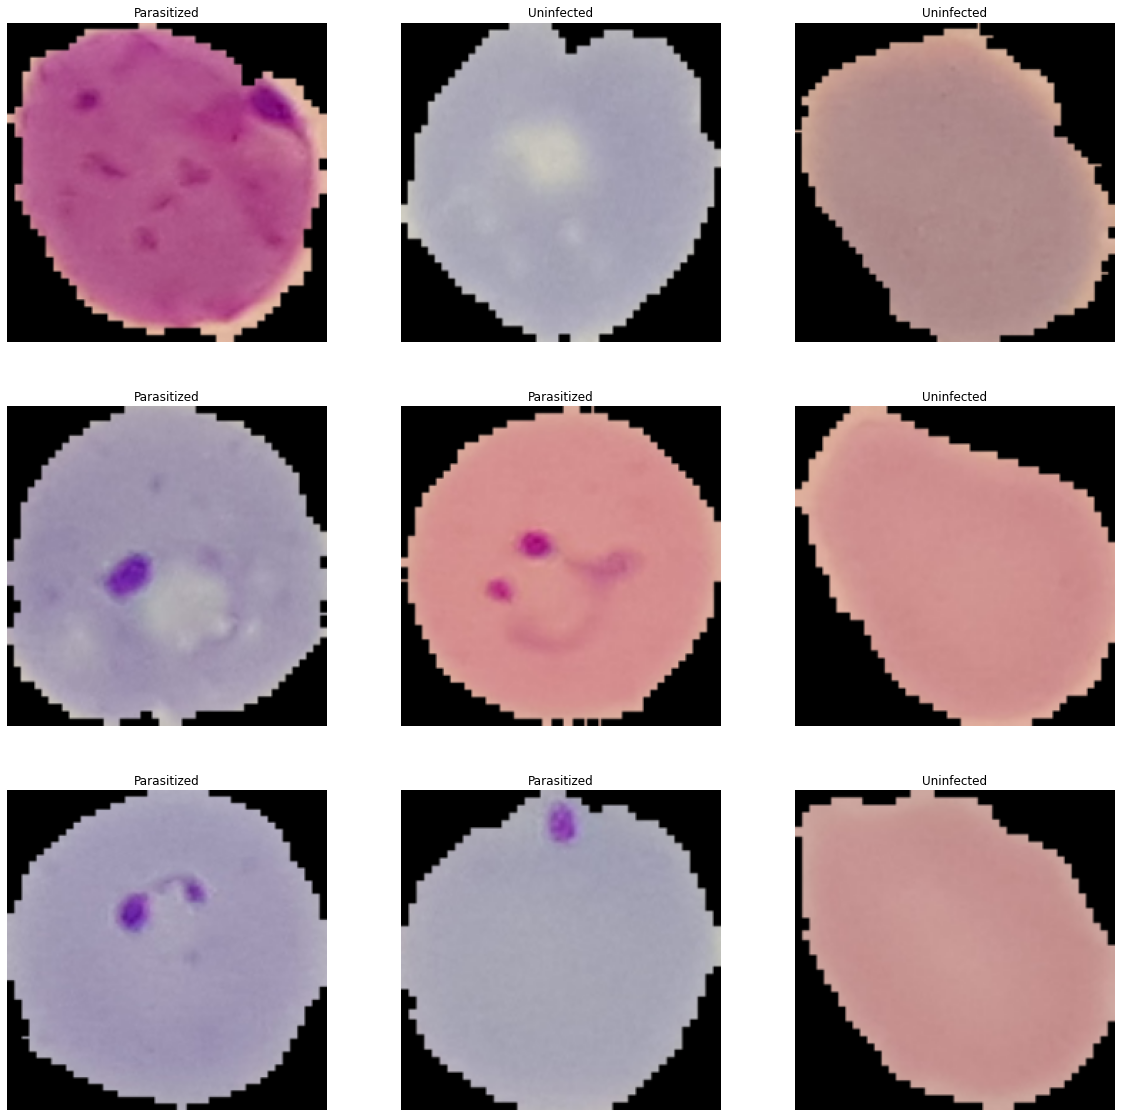

In [7]:
## visualize train set images
image_batch, label_batch = next(iter(train_ds))
plt.figure(figsize=(20, 20))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

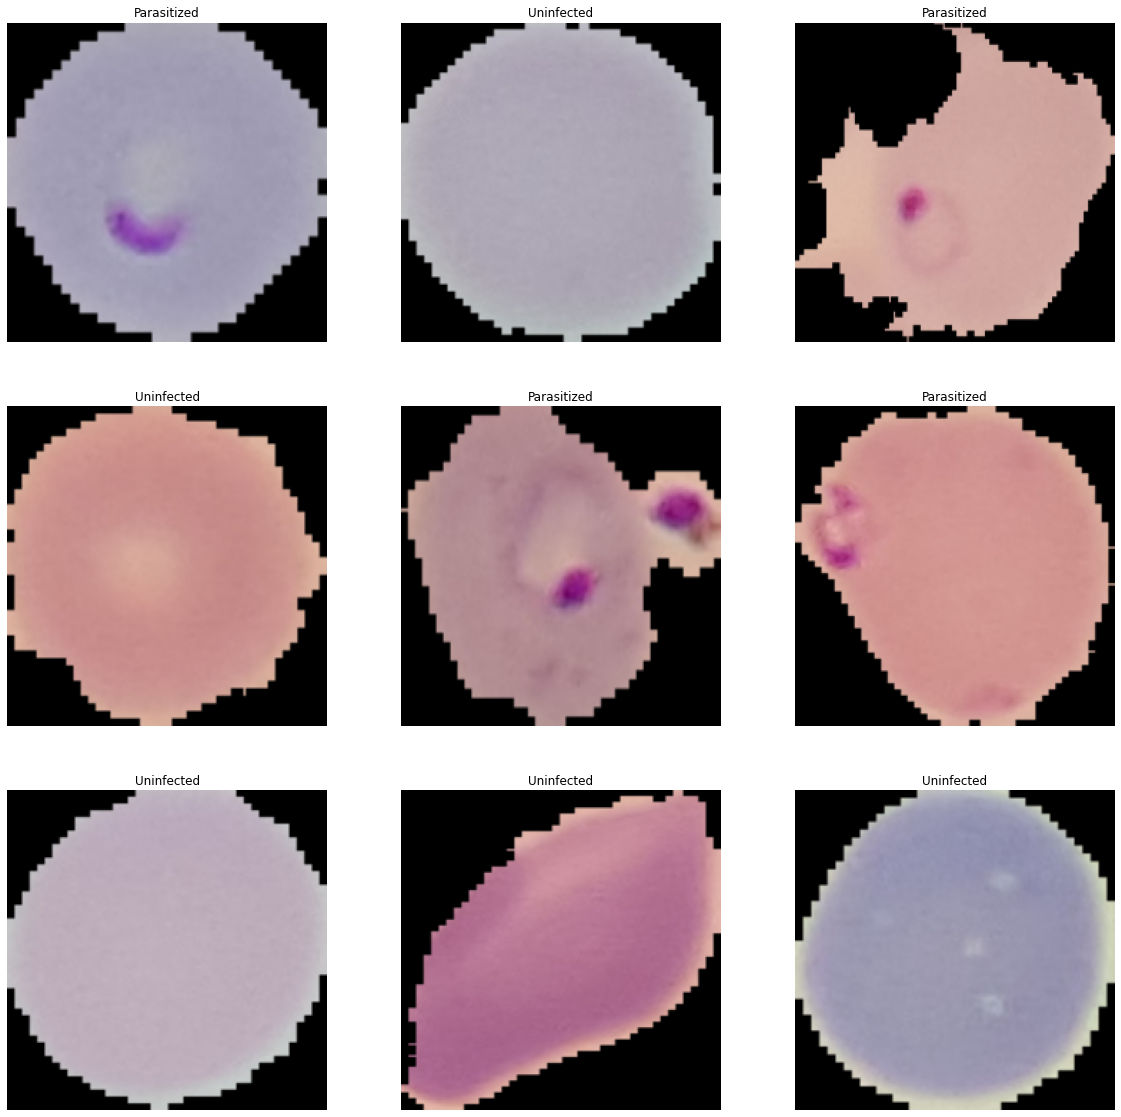

In [8]:
## visualize validation images 
image_batch, label_batch = next(iter(val_ds))
plt.figure(figsize=(20, 20))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")


In [9]:
## train image data set , convert into array .


train_labels = np.array([])
train_images = []
i = 0

for x, y in train_ds:
    n = x.shape[0]
    train_labels = np.concatenate([train_labels , y.numpy()])
    for j in range(n):
            train_images.append(x[j].numpy().astype("uint8"))
train_images = np.array(train_images)


In [10]:
train_images.shape

(20669, 224, 224, 3)

In [11]:
train_labels.shape

(20669,)

CPU times: user 32 s, sys: 2.95 s, total: 35 s
Wall time: 30 s
216/216 [==============================] - 54s 251ms/step - loss: 0.6932 - accuracy: 0.4933
Test image accuracy :0.4932501018047333
Classification Report
              precision    recall  f1-score   support

 Parasitized       0.49      1.00      0.66      3398
  Uninfected       0.00      0.00      0.00      3491

    accuracy                           0.49      6889
   macro avg       0.25      0.50      0.33      6889
weighted avg       0.24      0.49      0.33      6889

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
dense (Dense)                (None, 128)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


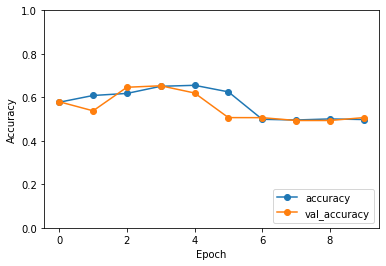

In [13]:
##  two layer nn

##
model = tf.keras.models.Sequential([
     tf.keras.layers.experimental.preprocessing.Rescaling(1./255), 
    tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(2, activation=tf.nn.softmax)])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_images,train_labels,  epochs=10, validation_split = 0.2 , verbose = 0)
##
test_loss, test_acc = model.evaluate(val_ds)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model.save('model_nn_1')
##
## for test data set , check the classification report.
test_pred = np.array([])
test_labels = np.array([])
for x, y in val_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    test_pred = np.concatenate([test_pred,np.array(predictions)])
    test_labels = np.concatenate([test_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(test_labels, test_pred, target_names=class_names))
##
print(model.summary())
##
print("Confusion matrix :\n")
print(confusion_matrix(test_labels, test_pred))

CPU times: user 32.4 s, sys: 2.75 s, total: 35.1 s
Wall time: 29.2 s
216/216 [==============================] - 15s 66ms/step - loss: 0.6931 - accuracy: 0.5067
Test image accuracy :0.5067498683929443
Classification Report
              precision    recall  f1-score   support

 Parasitized       0.00      0.00      0.00      3398
  Uninfected       0.51      1.00      0.67      3491

    accuracy                           0.51      6889
   macro avg       0.25      0.50      0.34      6889
weighted avg       0.26      0.51      0.34      6889

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_3 (Dense)              (Non

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


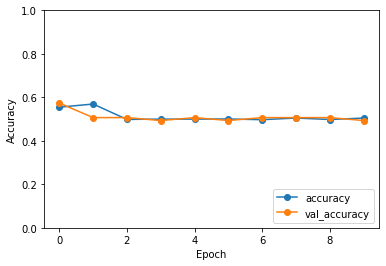

In [14]:
##  three layer nn

##
model = tf.keras.models.Sequential([
     tf.keras.layers.experimental.preprocessing.Rescaling(1./255), 
    tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(2, activation=tf.nn.softmax)])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_images,train_labels,  epochs=10, validation_split = 0.2 , verbose = 0)
##
test_loss, test_acc = model.evaluate(val_ds)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model.save('model_nn_1')
##
## for test data set , check the classification report.
test_pred = np.array([])
test_labels = np.array([])
for x, y in val_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    test_pred = np.concatenate([test_pred,np.array(predictions)])
    test_labels = np.concatenate([test_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(test_labels, test_pred, target_names=class_names))
##
print(model.summary())
##
print("Confusion matrix :\n")
print(confusion_matrix(test_labels, test_pred))

CPU times: user 32.5 s, sys: 3.05 s, total: 35.5 s
Wall time: 29.8 s
216/216 [==============================] - 25s 111ms/step - loss: 0.6933 - accuracy: 0.4933
Test image accuracy :0.4932501018047333
Classification Report
              precision    recall  f1-score   support

 Parasitized       0.49      1.00      0.66      3398
  Uninfected       0.00      0.00      0.00      3491

    accuracy                           0.49      6889
   macro avg       0.25      0.50      0.33      6889
weighted avg       0.24      0.49      0.33      6889

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_7 (Dense)              (No

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


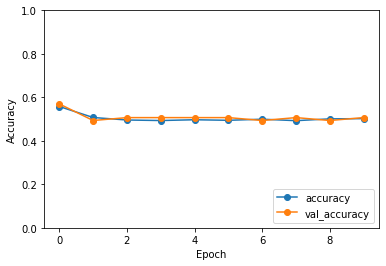

In [15]:
##  four layer nn

##
model = tf.keras.models.Sequential([
     tf.keras.layers.experimental.preprocessing.Rescaling(1./255), 
    tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(2, activation=tf.nn.softmax)])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_images,train_labels,  epochs=10, validation_split = 0.2 , verbose = 0)
##
test_loss, test_acc = model.evaluate(val_ds)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model.save('model_nn_1')
##
## for test data set , check the classification report.
test_pred = np.array([])
test_labels = np.array([])
for x, y in val_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    test_pred = np.concatenate([test_pred,np.array(predictions)])
    test_labels = np.concatenate([test_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(test_labels, test_pred, target_names=class_names))
##
print(model.summary())
##
print("Confusion matrix :\n")
print(confusion_matrix(test_labels, test_pred))

CPU times: user 31.9 s, sys: 3.3 s, total: 35.2 s
Wall time: 28.4 s
216/216 [==============================] - 41s 183ms/step - loss: 0.6933 - accuracy: 0.4933
Test image accuracy :0.4932501018047333
Classification Report
              precision    recall  f1-score   support

 Parasitized       0.49      1.00      0.66      3398
  Uninfected       0.00      0.00      0.00      3491

    accuracy                           0.49      6889
   macro avg       0.25      0.50      0.33      6889
weighted avg       0.24      0.49      0.33      6889

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
dense (Dense)                (None,

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


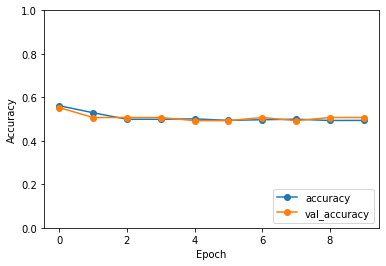

In [12]:
##  four layer nn with less neurons

##
model = tf.keras.models.Sequential([
     tf.keras.layers.experimental.preprocessing.Rescaling(1./255), 
    tf.keras.layers.Flatten(),
tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
tf.keras.layers.Dense(2, activation=tf.nn.softmax)])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_images,train_labels,  epochs=10, validation_split = 0.2 , verbose = 0)
##
test_loss, test_acc = model.evaluate(val_ds)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model.save('model_nn_1')
##
## for test data set , check the classification report.
test_pred = np.array([])
test_labels = np.array([])
for x, y in val_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    test_pred = np.concatenate([test_pred,np.array(predictions)])
    test_labels = np.concatenate([test_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(test_labels, test_pred, target_names=class_names))
##
print(model.summary())
##
print("Confusion matrix :\n")
print(confusion_matrix(test_labels, test_pred))

By seeing the performance of the various neural network models above , it is seen that they are not good enough for the malaria cell classification.The accuracy and the classifcation metrics are very poor.   
More deeper model architecture  with convolution would be necessary for the given purpose.    